# House Rent Prediction

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\MAHARSH SHAH\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('HouseRent.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Basic Checks 

In [3]:
df.shape

(4746, 12)

In [4]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [10]:
df.rename(columns={'Area Type':'AT','Area Locality':'AL','Furnishing Status':'FS','Tenant Preferred':'TP','Point of Contact':'POC'}, inplace=True)

In [11]:
df

,Posted On,BHK,Rent,Size,Floor,AT,AL,City,FS,TP,Bathroom,POC
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [12]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')


In [13]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Posted On', 'Floor', 'AT', 'AL', 'City', 'FS', 'TP', 'POC'], dtype='object')


In [14]:
for i in cat_data:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("**********************")

Posted On ['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09'


In [15]:
df.isnull().sum()

Posted On    0
BHK          0
Rent         0
Size         0
Floor        0
AT           0
AL           0
City         0
FS           0
TP           0
Bathroom     0
POC          0
dtype: int64

# EDA 

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='BHK', ylabel='Rent'>

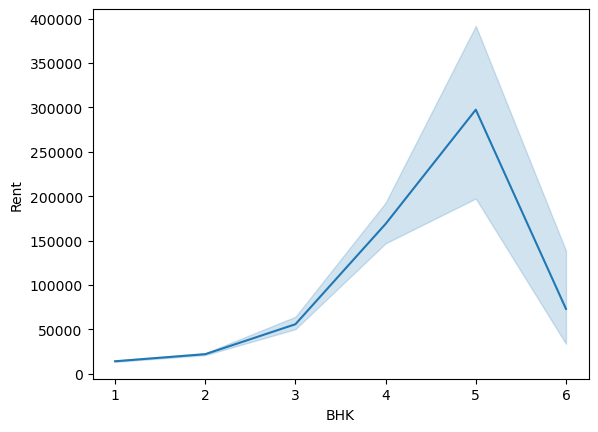

In [17]:
sns.lineplot(x=df.BHK,y=df.Rent)

<Axes: xlabel='Size', ylabel='Rent'>

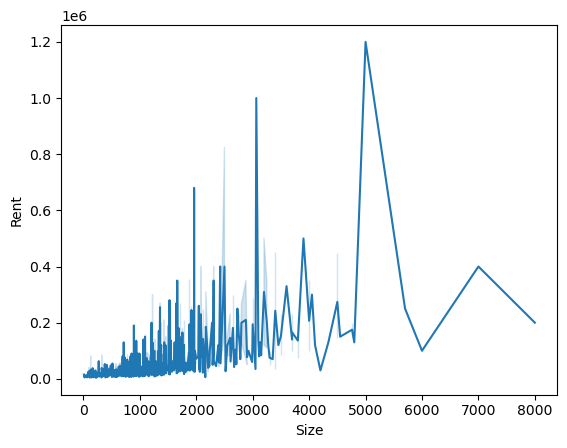

In [18]:
sns.lineplot(x=df.Size,y=df.Rent)

<Axes: xlabel='Bathroom', ylabel='Rent'>

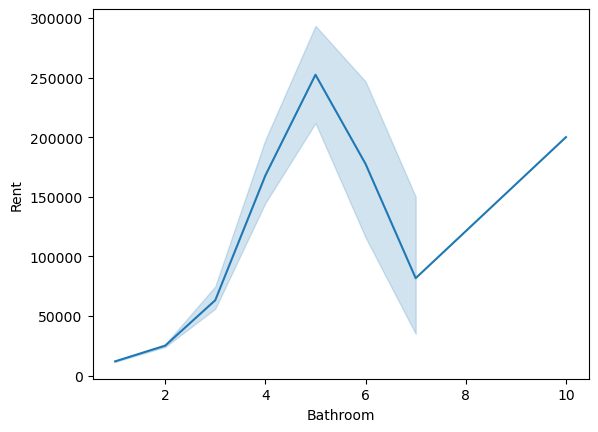

In [19]:
sns.lineplot(x=df.Bathroom,y=df.Rent)

<Axes: xlabel='BHK', ylabel='Rent'>

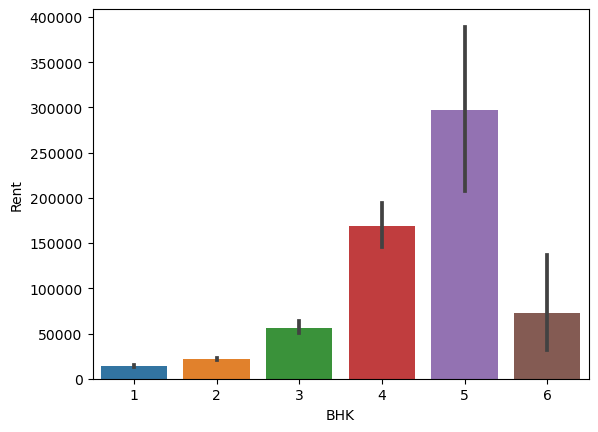

In [20]:
sns.barplot(x=df.BHK,y=df.Rent)

<Axes: xlabel='City', ylabel='Rent'>

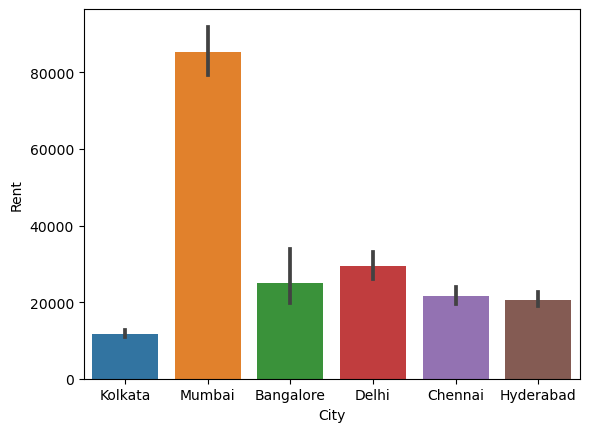

In [21]:
sns.barplot(x=df.City,y=df.Rent)

<Axes: xlabel='AT', ylabel='Rent'>

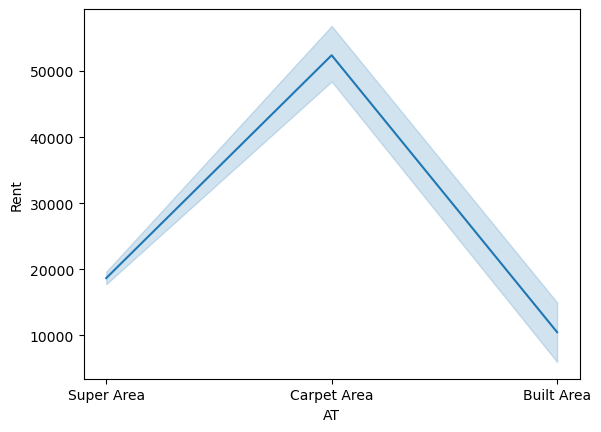

In [22]:
sns.lineplot(x=df.AT,y=df.Rent)

<Axes: xlabel='AT', ylabel='Rent'>

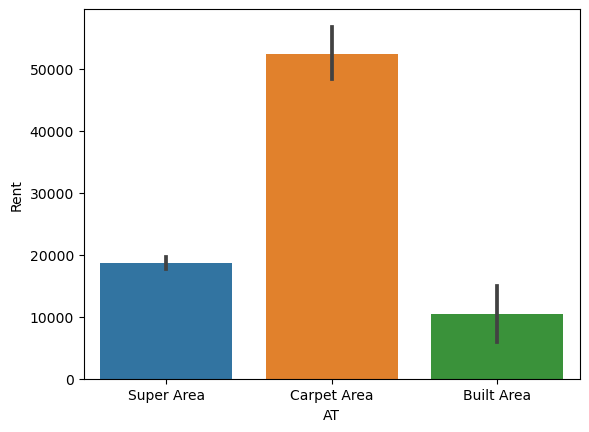

In [23]:
sns.barplot(x=df.AT,y=df.Rent)

<Axes: xlabel='Bathroom', ylabel='Rent'>

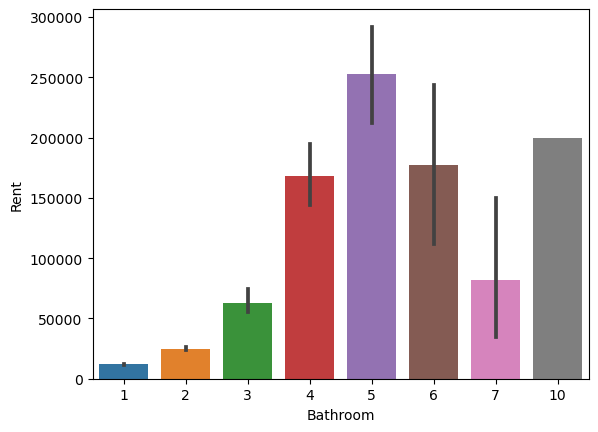

In [24]:
sns.barplot(x=df.Bathroom,y=df.Rent)

<Axes: xlabel='AT', ylabel='Count'>

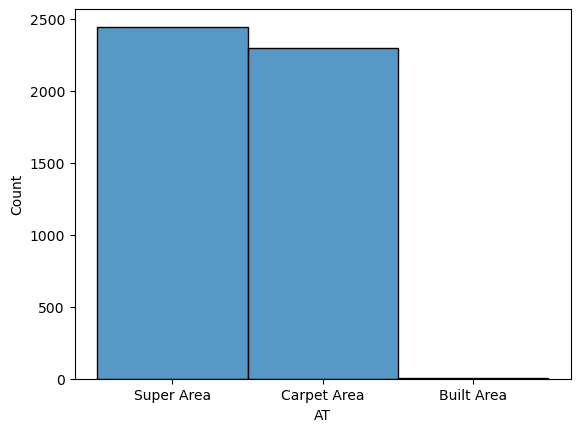

In [25]:
sns.histplot(x=df.AT)

<Axes: xlabel='BHK', ylabel='Count'>

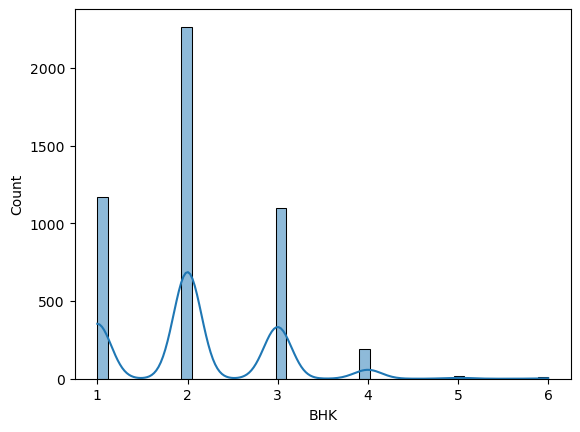

In [26]:
sns.histplot(x=df.BHK,kde=True)

<Axes: xlabel='Bathroom', ylabel='Count'>

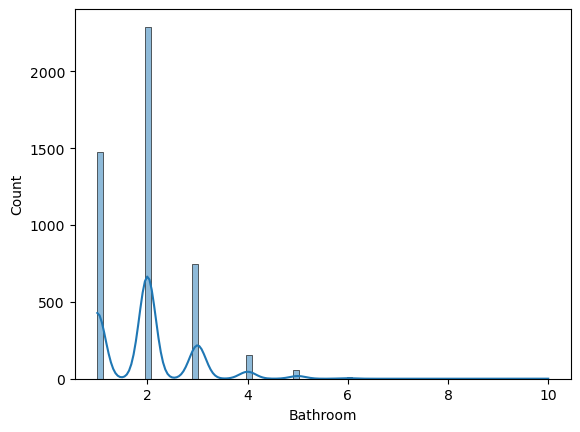

In [27]:
sns.histplot(x=df.Bathroom,kde=True)

<Axes: xlabel='Size', ylabel='Count'>

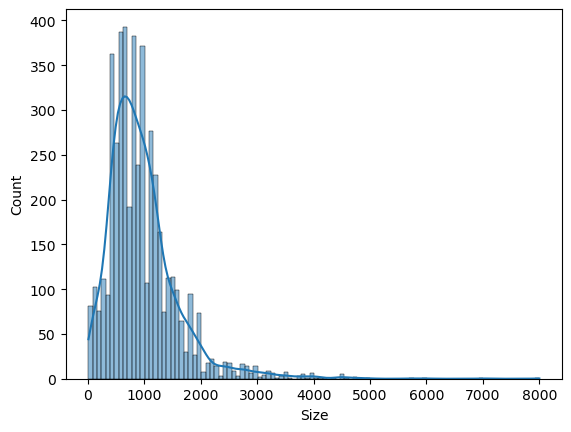

In [28]:
sns.histplot(x=df.Size,kde=True)

<Axes: xlabel='Rent'>

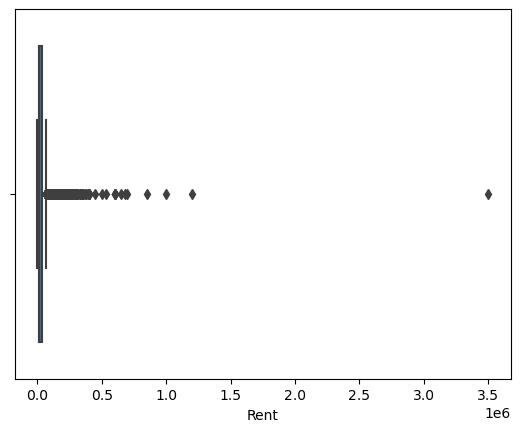

In [29]:
sns.boxplot(x=df.Rent)

<Axes: xlabel='Bathroom'>

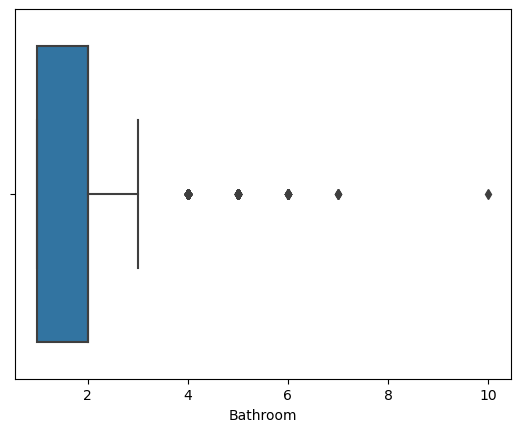

In [30]:
sns.boxplot(x=df.Bathroom)

<Axes: xlabel='BHK'>

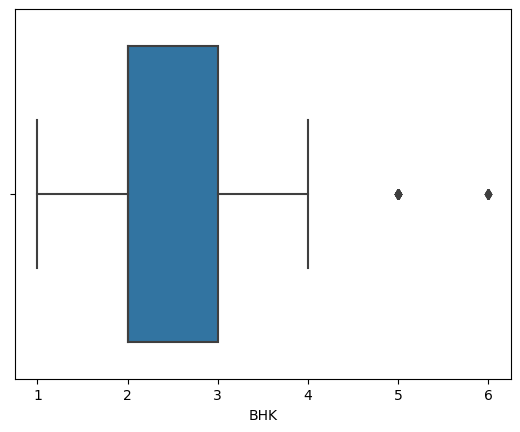

In [31]:
sns.boxplot(x=df.BHK)

<Axes: xlabel='BHK', ylabel='count'>

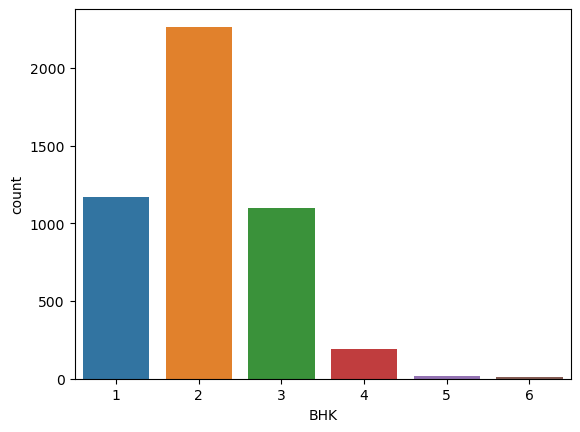

In [32]:
sns.countplot(x=df.BHK)

<Axes: xlabel='Rent'>

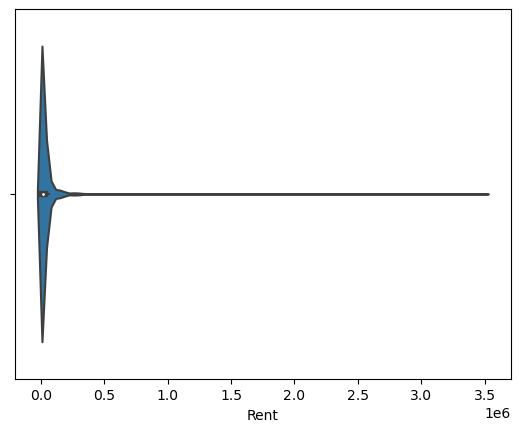

In [33]:
sns.violinplot(x=df.Rent)

<Axes: xlabel='BHK', ylabel='Rent'>

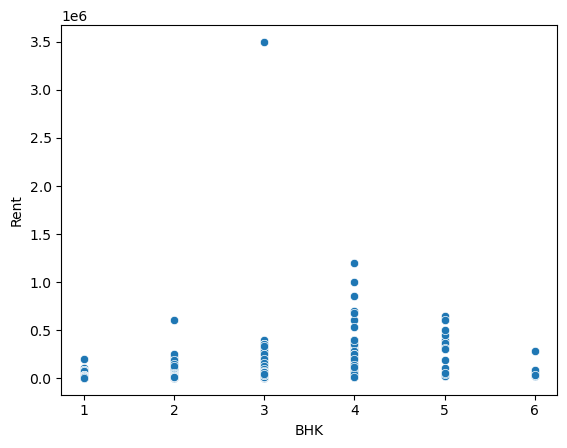

In [34]:
sns.scatterplot(x=df.BHK,y=df.Rent)

<Axes: xlabel='BHK', ylabel='Bathroom'>

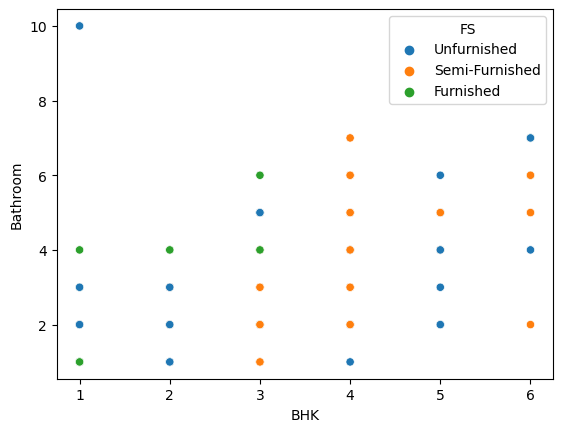

In [35]:
sns.scatterplot(x=df.BHK,y=df.Bathroom,hue=df.FS)

<Axes: xlabel='City', ylabel='count'>

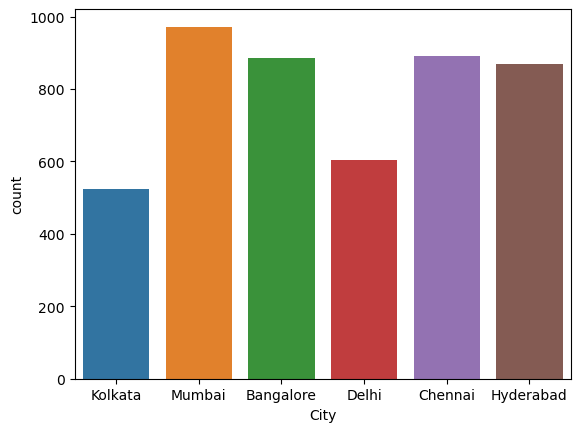

In [36]:
sns.countplot(x=df.City)

<Axes: xlabel='FS', ylabel='count'>

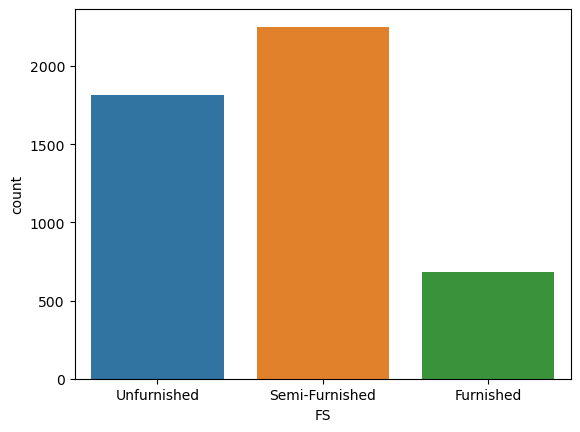

In [37]:
sns.countplot(x=df.FS)

<Axes: xlabel='TP', ylabel='count'>

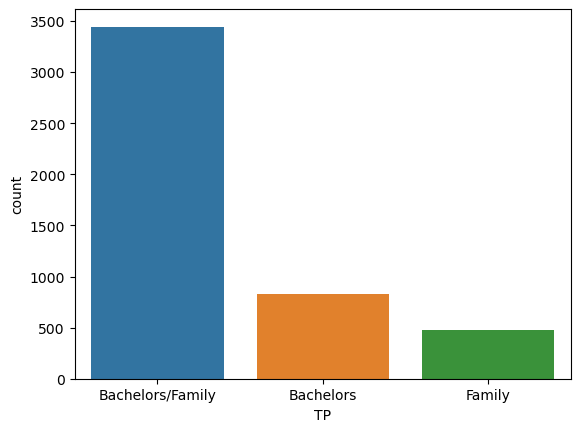

In [38]:
sns.countplot(x=df.TP)

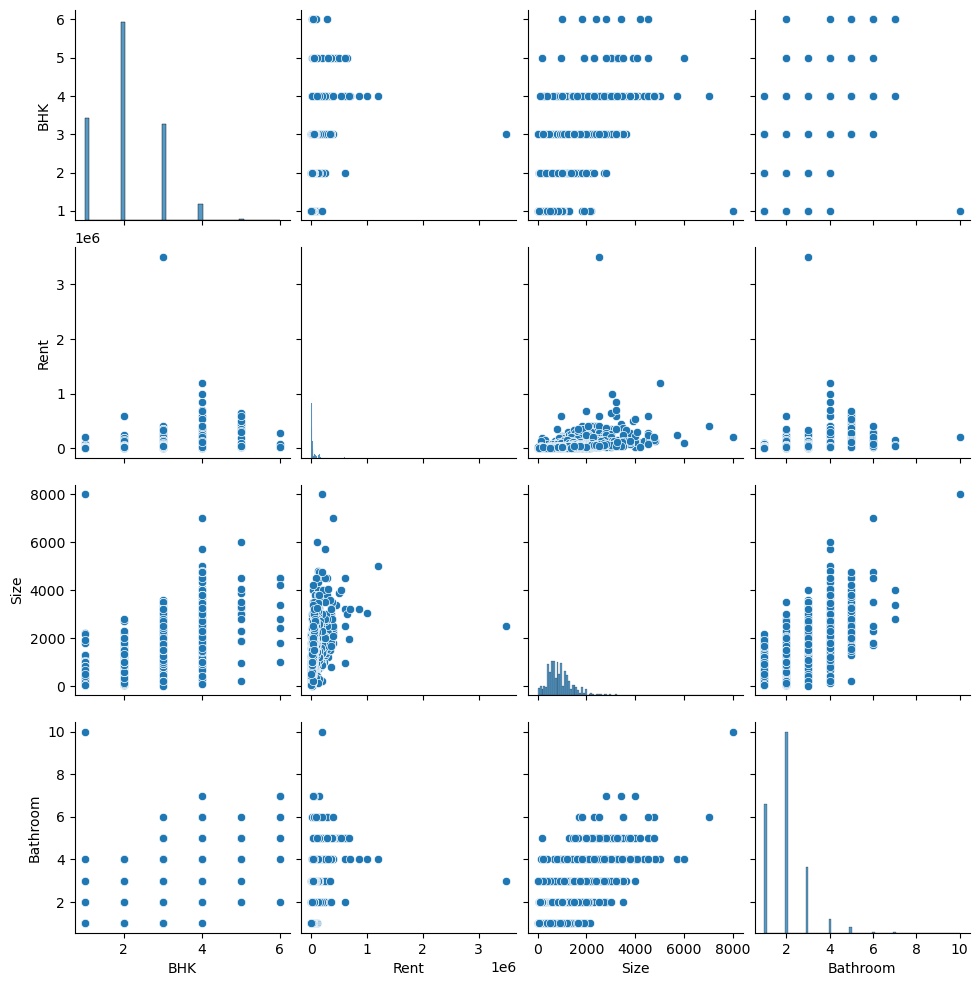

In [39]:
sns.pairplot(df)

# Converting Categorical to numeric columns 

In [40]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.AT=label.fit_transform(df.AT)

In [41]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.AL=label.fit_transform(df.AL)

In [42]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.City=label.fit_transform(df.City)

In [43]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.FS=label.fit_transform(df.FS)

In [44]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.TP=label.fit_transform(df.TP)

In [45]:

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.POC=label.fit_transform(df.POC)

In [46]:
df

,Posted On,BHK,Rent,Size,Floor,AT,AL,City,FS,TP,Bathroom,POC
0,2022-05-18,2,10000,1100,Ground out of 2,2,221,4,2,1,2,2
1,2022-05-13,2,20000,800,1 out of 3,2,1527,4,1,1,1,2
2,2022-05-16,2,17000,1000,1 out of 3,2,1760,4,1,1,1,2
3,2022-07-04,2,10000,800,1 out of 2,2,526,4,2,1,1,2
4,2022-05-09,2,7500,850,1 out of 2,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,1,219,3,1,1,2,2
4742,2022-05-15,3,29000,2000,1 out of 4,2,1214,3,1,1,3,2
4743,2022-07-10,3,35000,1750,3 out of 5,1,724,3,1,1,3,0
4744,2022-07-06,3,45000,1500,23 out of 34,1,590,3,1,2,2,0


In [47]:
## Removing constant features
df.drop(['Posted On','Floor','POC','TP'], axis="columns", inplace=True)#droping those columns which have std=0 

In [48]:
df

,BHK,Rent,Size,AT,AL,City,FS,Bathroom
0,2,10000,1100,2,221,4,2,2
1,2,20000,800,2,1527,4,1,1
2,2,17000,1000,2,1760,4,1,1
3,2,10000,800,2,526,4,2,1
4,2,7500,850,1,1890,4,2,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,219,3,1,2
4742,3,29000,2000,2,1214,3,1,3
4743,3,35000,1750,1,724,3,1,3
4744,3,45000,1500,1,590,3,1,2


# Feature Selection

<Axes: >

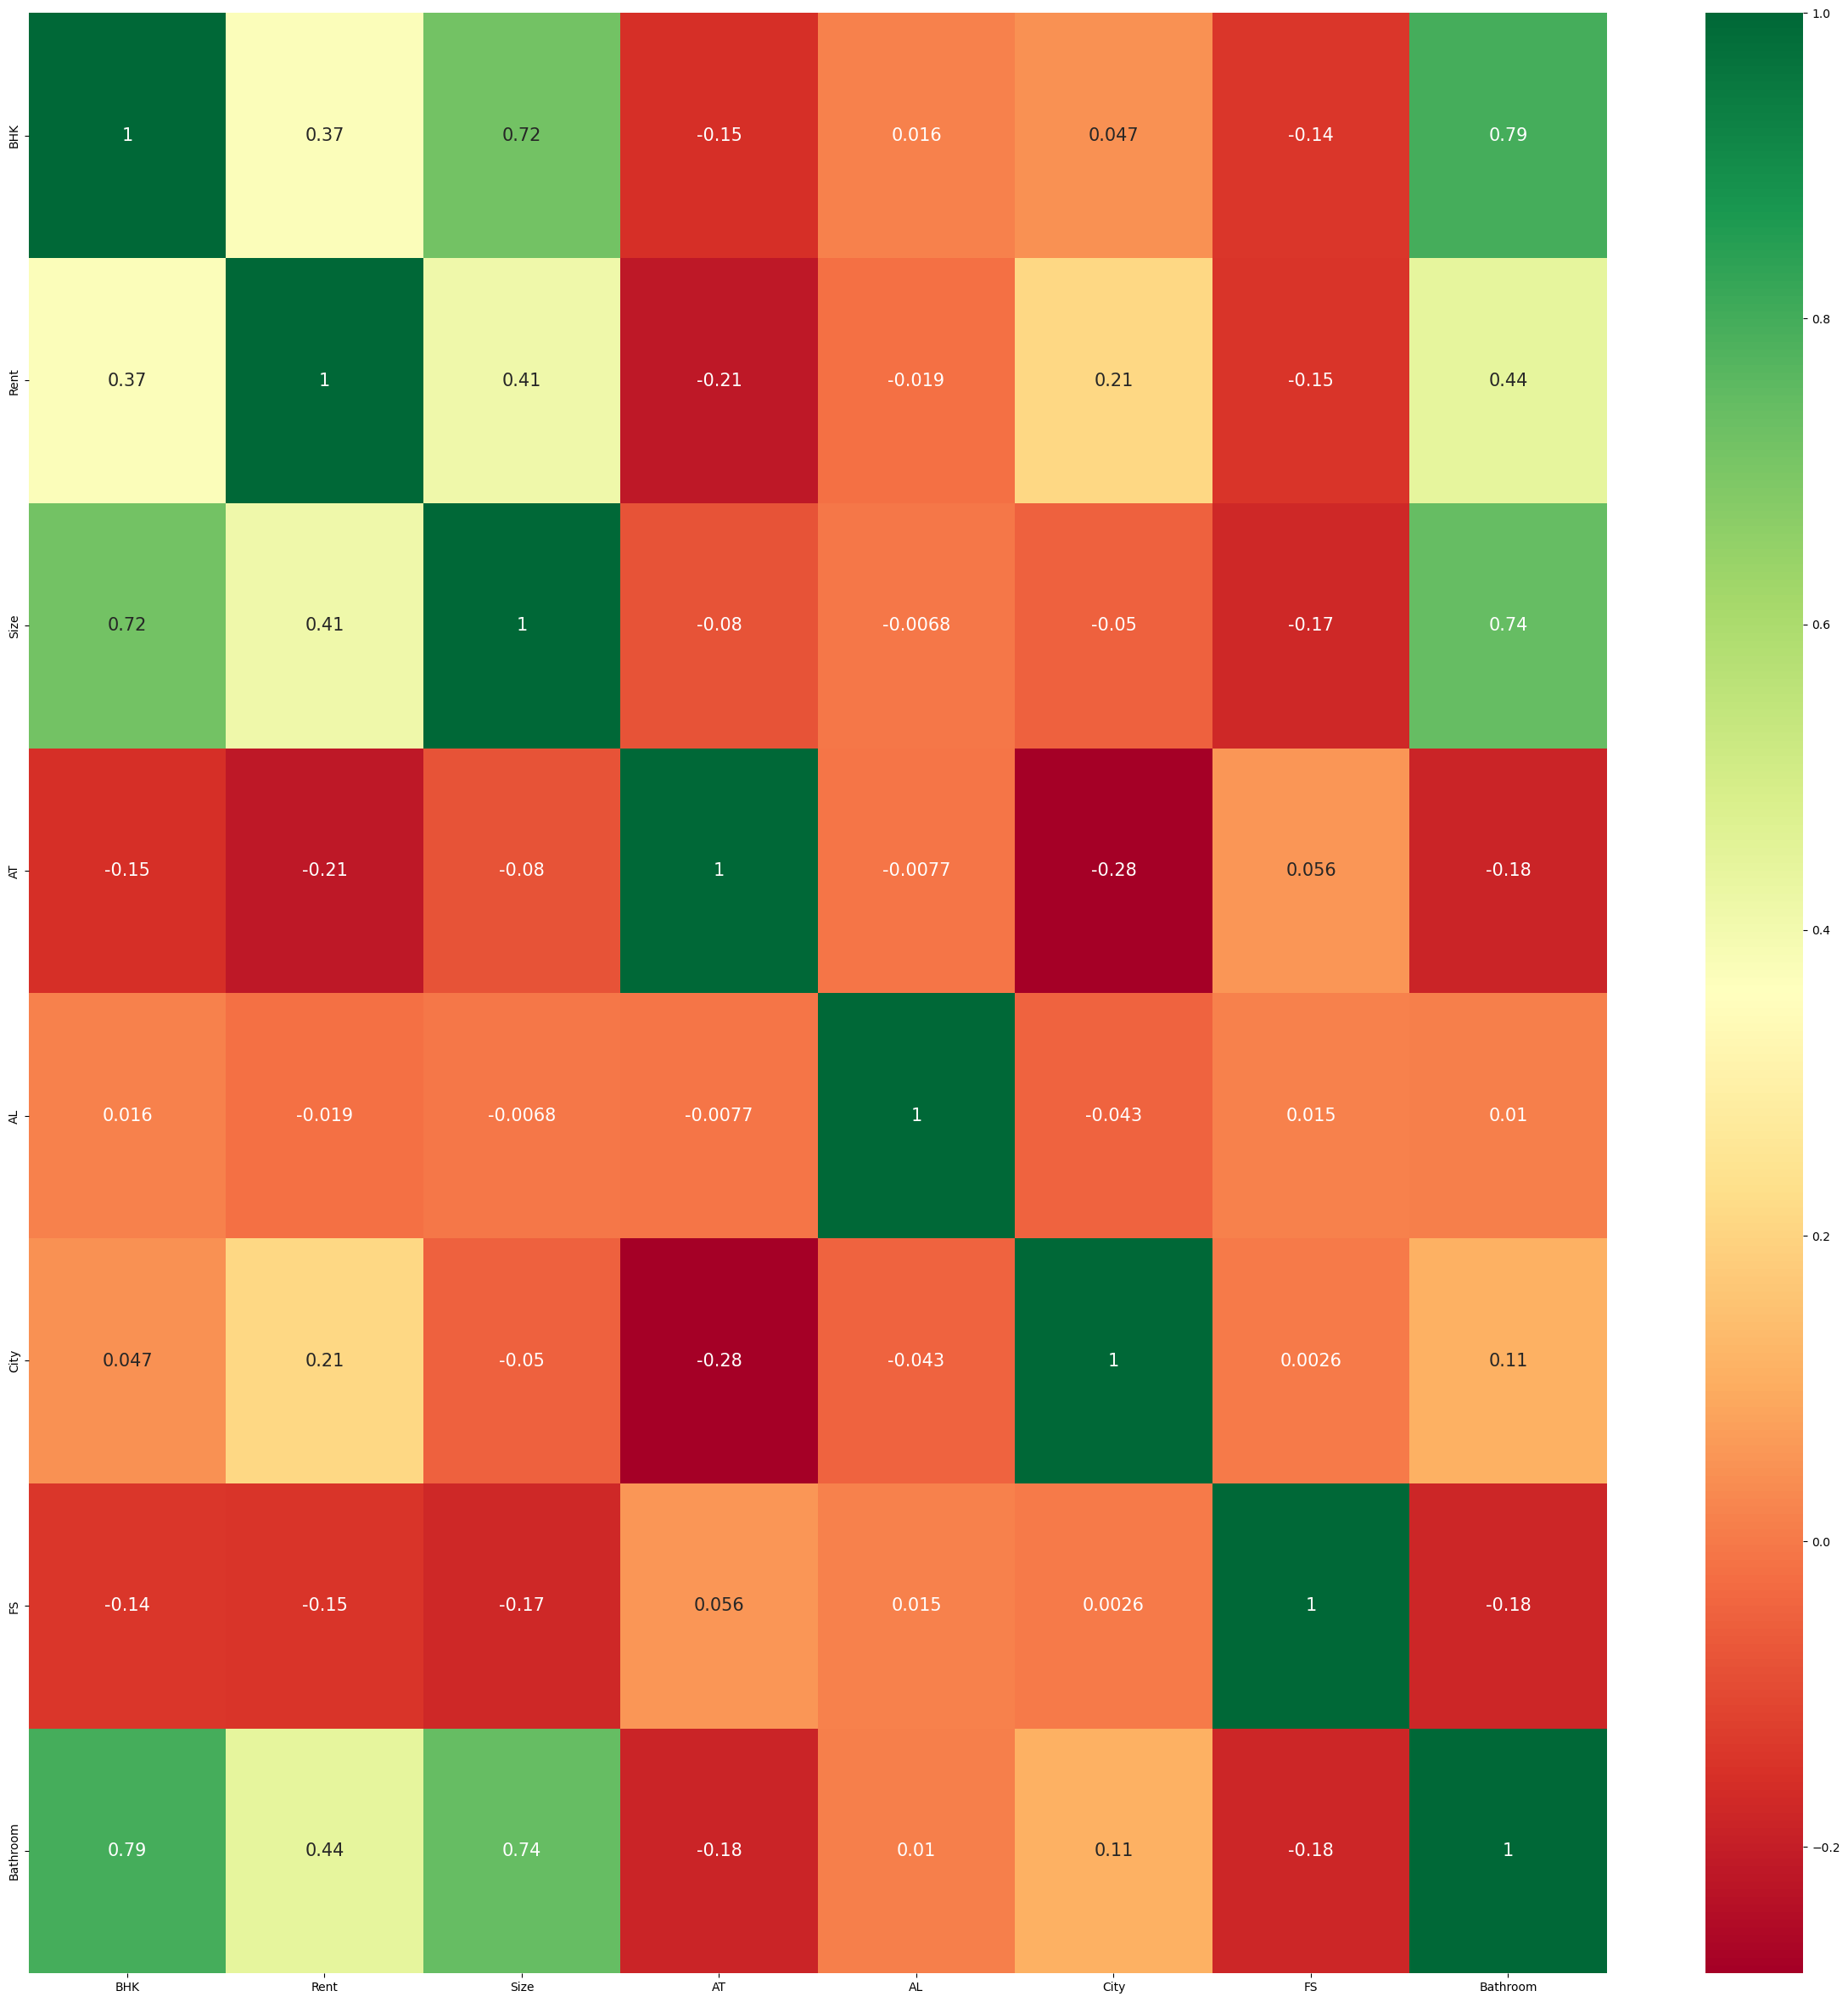

In [49]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Model Creation

In [50]:
## Split data into x and y
x = df.drop('Rent', axis=1)
y = df.Rent

In [51]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [52]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 2218060364.386509
R-squared (R2) score: 0.4434509052298745


In [53]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 1761058140.1455758
R-squared (R2) score: 0.5581205410490846


In [54]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1004751234.8173183
R-squared (R2) score: 0.7478908152432493


In [55]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 3611819667.1588216
R-squared (R2) score: 0.0937329756640034


In [56]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

y_pred = svm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 3404869644.5321064
R-squared (R2) score: 0.14566025843992203
